In [ ]:
 from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model


In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/snow_detection/"

test  train


In [ ]:
# Set the directory for the training images
train_dir = '/snow_detection/train'
test_dir = '/snow_detection/test'

from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Rescale the pixel values to the range [0, 1]
    rotation_range=20,   # Randomly rotate the images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the images horizontally by up to 20% of the image width
    height_shift_range=0.2, # Randomly shift the images vertically by up to 20% of the image height
    shear_range=0.2,         # Randomly shear the images by up to 20%
    zoom_range=0.2,          # Randomly zoom the images by up to 20%
    horizontal_flip=True,    # Randomly flip the images horizontally
    fill_mode='nearest'      # Fill any empty pixels with the nearest available pixel value
)

# Create an instance of ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(
    rescale=1./255   # Rescale the pixel values to the range [0, 1]
)

# Use the flow_from_directory method to load the images from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,                 # Path to the training set directory
    target_size=(256, 256),    # Resize the images to 256x256
    batch_size=32,             # Use batches of 32 images
    class_mode='categorical'   # Use categorical cross-entropy loss
)

test_generator = test_datagen.flow_from_directory(
    test_dir,                  # Path to the test set directory
    target_size=(256, 256),    # Resize the images to 256x256
    batch_size=32,             # Use batches of 32 images
    class_mode='categorical'   # Use categorical cross-entropy loss
)

# Load the training data into x_train and y_train
x_train, y_train = train_generator.next()


Found 357 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [ ]:
#Build the model

model = models.Sequential()

# add the convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# add the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
# # Load the VGG16 model pre-trained on ImageNet
# base_model = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# # Freeze the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Add a custom classifier on top
# x = base_model.output
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(3, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)   


# model.summary()

In [ ]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=30,
#     validation_data=test_generator,
#     validation_steps=len(test_generator)
# )

In [ ]:
#Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=30)


Epoch 1/30
12/12 [==============================] - 75s 6s/step - loss: 1.6368 - accuracy: 0.6246
Epoch 2/30
12/12 [==============================] - 75s 6s/step - loss: 0.7691 - accuracy: 0.6527
Epoch 3/30
12/12 [==============================] - 73s 6s/step - loss: 0.5528 - accuracy: 0.7927
Epoch 4/30
12/12 [==============================] - 73s 6s/step - loss: 0.5075 - accuracy: 0.8207
Epoch 5/30
12/12 [==============================] - 73s 6s/step - loss: 0.3718 - accuracy: 0.8880
Epoch 6/30
12/12 [==============================] - 75s 6s/step - loss: 0.5150 - accuracy: 0.8347
Epoch 7/30
12/12 [==============================] - 73s 6s/step - loss: 0.4254 - accuracy: 0.8964
Epoch 8/30
12/12 [==============================] - 73s 6s/step - loss: 0.2932 - accuracy: 0.8880
Epoch 9/30
12/12 [==============================] - 73s 6s/step - loss: 0.6739 - accuracy: 0.8824
Epoch 10/30
12/12 [==============================] - 75s 6s/step - loss: 0.2325 - accuracy: 0.9216
Epoch 11/30
12/12 [

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print('Validation loss:', loss)
print('Validation accuracy:', accuracy)


2/2 [==============================] - 3s 294ms/step - loss: 0.2167 - accuracy: 0.8750
Validation loss: 0.21669399738311768
Validation accuracy: 0.875


In [ ]:
class_dict = {0: "all_snow", 1: "no_snow", 2: "partial_snow"}


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array

# img_path = '/snow_detection/validate/all_snow/snow_on_solar_14.jpg'

# # Load and preprocess your image
# img = load_img(img_path, target_size=(256, 256))
# img = img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.0

# # Make a prediction
# prediction = model.predict(img)

# # Get the predicted class
# predicted_class = np.argmax(prediction, axis=1)

# print(class_dict[predicted_class[0]])

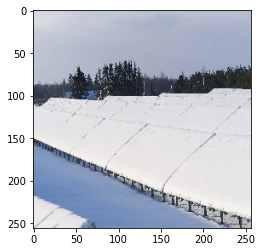

1/1 [==============================] - 0s 108ms/step

all_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img_path = '/snow_detection/validate/all_snow/snow_on_solar_14.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])



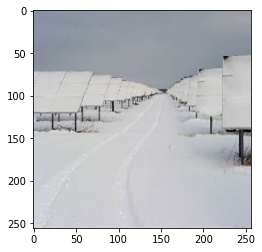

1/1 [==============================] - 0s 59ms/step

all_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/all_snow/snow_on_solar_08.jpeg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

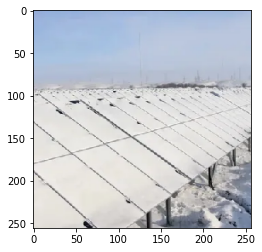

1/1 [==============================] - 0s 61ms/step

all_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/all_snow/snow_on_solar_10.jpg.webp'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

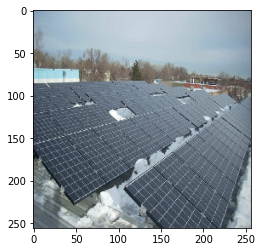

1/1 [==============================] - 0s 58ms/step

no_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/no_snow/snow_on_solar_15.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

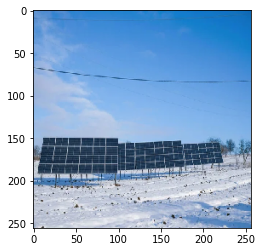

1/1 [==============================] - 0s 59ms/step

no_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/no_snow/snow_on_solar_12.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

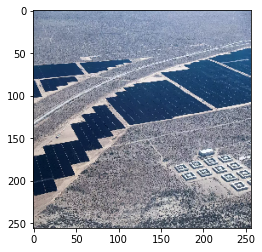

1/1 [==============================] - 0s 59ms/step

no_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/no_snow/snow_on_solar_05.webp'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

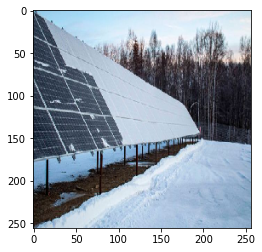

1/1 [==============================] - 0s 59ms/step

partial_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/partial_snow/snow_on_solar_03.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])

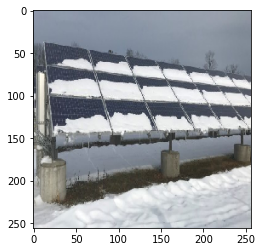

1/1 [==============================] - 0s 57ms/step

partial_snow


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = '/snow_detection/validate/partial_snow/snow_on_solar_17.jpg'

# Load and preprocess your image
img = load_img(img_path, target_size=(256, 256))
# Show image
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

print("")
print(class_dict[predicted_class[0]])